In [2]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as S
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from nltk.corpus import wordnet as wn
nltk.download('wordnet')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nishitsamarth/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nishitsamarth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nishitsamarth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In this section of code we are installing the necessary packages required to perform the sentiment analysis, and the necessary preprocesses to acquire the text data that we are looking to gather from the subreddits from reddit. This information is all in the requirements.txt as well.


In [3]:
! pip install praw
import praw

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
user_agent = "Scraper 1.0 by /u/Alternative_Elk2555"
reddit = praw.Reddit(
    client_id = "ggBGWPlZTGbJWFmr0nyiRw",
    client_secret = "vk_rAmVVOihqxWJDo1AnfyHbEEIXvA",
    user_agent = user_agent,
    check_for_async=False
)

In the two sections of code above we are installing and setting up the web crawler for the subreddits so that way we have a means of extracting the content of the subreddit posts.

In [5]:
headlines_uiuc = []
comments_uiuc = []
for submission in reddit.subreddit('UIUC').hot(limit = 500):
   #print(submission.title, "title")
  comments = []
  for comment in submission.comments:
    # print(comment.body, "body")
    comments.append(comment.body)
  headlines_uiuc.append(submission.title)
  # print(headlines_uiuc, "headline")
  comments_uiuc.append(comments)
  # print(comments_uiuc, "comment")
# print(comments_uiuc, "comments_uiuc")

headlines_chicago = []
comments_chicago = []
for submission in reddit.subreddit('chicago').hot(limit = 500):
  # print(submission.title, ",title")
  comments = []
  for comment in submission.comments:
    if hasattr(comment, 'body'):
      comments.append(comment.body)
    else:
      continue
  headlines_chicago.append(submission.title)
  comments_chicago.append(comments)
# print(len(headlines_chicago))

In this section of code we are extracting all of the posts from each respective subreddit so that way we have access to the actual contents of the subreddits to use when later on we filter for posts respective to food. This is being done with the webscraper and we make sure to grab both the comments and the titles for each post so they can be analyzed later


In [6]:
print(len(headlines_uiuc))
print(len(comments_uiuc))
print(len(headlines_chicago))
print(len(comments_chicago))
df = pd.DataFrame({'headline':headlines_uiuc, 'comments':comments_uiuc})
df['most_association'] = 0

for index, row in df.iterrows():
  title = row[0]
  # print(title)
  # remove stopwords
  title = re.sub("[\[].*?[\]]", "", title)
  title =re.sub(r"[^a-zA-Z.]+", ' ', title)
  tokenize_list = word_tokenize(title)
  # print(tokenize_list)
  if len(tokenize_list) == 0:
    continue

  total_association = 0
  for word in tokenize_list:
    word1 = word
    word2 = "food"
    if len(wn.synsets(word1)) == 0:
      continue
    syn1 = wn.synsets(word1)[0]
    syn2 = wn.synsets(word2)[0]
    value = syn1.wup_similarity(syn2)
    if value > total_association:
      total_association = value

  df.at[index, 'most_association'] = total_association
df = df.sort_values(by=['most_association'], ascending=False)
df = df.head(50)



# Starting filtering of chicago reddit posts
df2 = pd.DataFrame({'headline':headlines_chicago, 'comments':comments_chicago})
df2['most_association'] = 0

for index, row in df2.iterrows():
  title = row[0]
  print(title)
  # remove stopwords
  title = re.sub("[\[].*?[\]]", "", title)
  title =re.sub(r"[^a-zA-Z.]+", ' ', title)
  tokenize_list = word_tokenize(title)
  print(tokenize_list)
  if len(tokenize_list) == 0:
    continue

  total_association = 0
  for word in tokenize_list:
    word1 = word
    word2 = "food"
    if len(wn.synsets(word1)) == 0:
      continue
    syn1 = wn.synsets(word1)[0]
    syn2 = wn.synsets(word2)[0]
    value = syn1.wup_similarity(syn2)
    if value > total_association:
      total_association = value

  df2.at[index, 'most_association'] = total_association
df2 = df2.sort_values(by=['most_association'], ascending=False)
df2 = df2.head(50)

# displaying both dfs
display(df)
display(df2)

500
500
500
500
Weekly Casual Conversation & Questions Thread
['Weekly', 'Casual', 'Conversation', 'Questions', 'Thread']
Christmas/NYE Megathread
['Christmas', 'NYE', 'Megathread']
Chicago's progressive Mayor Brandon Johnson announces plans to ax Windy City's high-achieving selective-enrollment high schools to boost 'equity' despite promising not to during election campaign
['Chicago', 's', 'progressive', 'Mayor', 'Brandon', 'Johnson', 'announces', 'plans', 'to', 'ax', 'Windy', 'City', 's', 'high', 'achieving', 'selective', 'enrollment', 'high', 'schools', 'to', 'boost', 'equity', 'despite', 'promising', 'not', 'to', 'during', 'election', 'campaign']
My new favorite city
['My', 'new', 'favorite', 'city']
Travis Scott concert at UC tonight - cancelled
['Travis', 'Scott', 'concert', 'at', 'UC', 'tonight', 'cancelled']
New metra fare plan, yikes.
['New', 'metra', 'fare', 'plan', 'yikes', '.']
Found the lit up car from a few nights ago I think.
['Found', 'the', 'lit', 'up', 'car', 'from',

,headline,comments,most_association
448,Midnight Breakfast Wednesday! | December 6 at ...,[Hi! Will this be available for non-resident s...,0.769231
118,Where can I get a large quantity of miso soup ...,[Asian grocery stores like Fresh should have d...,0.769231
413,Today/Wednesday - humor and song - Celebrate t...,"[So,e good seats still available. Buy on line ...",0.769231
445,Best sushi place on campus,[Sakanaya is decent if you can get a reservati...,0.769231
162,"If you're in town for NYE, Canopy Club is host...",[],0.769231
173,Dude offering his Burrito at CIF this morning,"[Is this really about a burrito, I gotta respe...",0.769231
244,Murphy's Last 2023 Trivia!,[],0.769231
474,Midnight Breakfast Wednesday! | December 6 at ...,[Can I use my dining dollars to swipe a friend...,0.769231
229,GARLIC BREAD!,"[Under there, In the steam tunnels]",0.769231
25,204 E Clark or 205 E Healey,[],0.714286


,headline,comments,most_association
404,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...,1.000000
477,Unique International Food spots,"[Hi! You appear to be asking a question, pleas...",1.000000
379,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas...",1.000000
247,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas...",0.909091
420,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas...",0.833333
14,"Starbucks Broke Labor Law, Must Reopen Unioniz...",[A little confusing but it seems the process i...,0.833333
147,Saw this on my morning walk to get coffee,[We have a proud history of hating the mayor.\...,0.833333
78,Fav local light-roast coffee,[The Rainforest Microlot by Benjamin Weiner fr...,0.833333
293,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...,0.833333
450,Unique rehearsal dinner spots in Chicago?,[When are you trying to host it? Knowing the s...,0.769231


In this section we are filtering the posts by using the token of "food" to filter for posts that pertain to that topic, we used the token of "food" because we found that keyword had the best results pertaining to food. Essentially, we check the similarity score of the title of each post with the words food to see how relevant they are for our idea. If they contain either word or have a high similarity score, they will likely be used for the next phase of our project.
We implemented this through the use of tokenization.

In [7]:
# starting sentiment analysis
s_uiuc = S()
results_uiuc = []

s_chicago = S()
results_chicago = []

for index, row in df.iterrows():
  line = row[0]
  polarity = s_uiuc.polarity_scores(line)
  polarity['headline'] = line
  polarity['comments'] = row[1]
  results_uiuc.append(polarity)

for index, row in df2.iterrows():
  line = row[0]
  polarity = s_chicago.polarity_scores(line)
  polarity['headline'] = line
  polarity['comments'] = row[1]
  results_chicago.append(polarity)

pprint(results_uiuc[:3], width = 100)
print("\n")
print("\n")
pprint(results_chicago[:3], width = 100)


[{'comments': ["Hi! Will this be available for non-resident students who are on the meal plan? I'm "
               'on the 6-meal one specifically.',
               '(Now with image, because...)\n'
               '\n'
               '>Midnight Breakfast is a fun way to take a break and relieve stress before finals '
               'begin.  \n'
               'Visit the Ike or ISR Dining Centers on December 6 from 10 p.m. – Midnight to '
               'chow  \n'
               'down on brioche french toast, breakfast pizza, build-your-own breakfast burrito  \n'
               'and more! Free for meal plan holders. \n'
               '\n'
               '  \n'
               'Midnight Breakfast is open to any current resident of University Housing with a '
               'meal plan. It\'s "included" and does not cost a meal.  \n'
               "I'll be serving pizzas at Ike after 10:45pm, come say hi.  \n"
               "We'll also have some other guest stars working as well (mostly 

In this section of code we are performing sentiment analysis from the respective posts that we have obtained earlier through the use of tokenization, we obtained the sentiment analysis through the use of polarization which allowed for us to identify if posts were negative, neutral, and positive as indicated within the output. We did this for each respective subreddit: UIUC and chicago, from which now we have a baseline for the tone of the posts which will then allow us to utilize this data later on to assess the top rated posts.

In [8]:
df = pd.DataFrame.from_records(results_uiuc)
df.head()

df2 = pd.DataFrame.from_records(results_chicago)
df2.head()

display(df)
display(df2)

,neg,neu,pos,compound,headline,comments
0,0.000,1.000,0.000,0.0000,Midnight Breakfast Wednesday! | December 6 at ...,[Hi! Will this be available for non-resident s...
1,0.000,0.857,0.143,0.3612,Where can I get a large quantity of miso soup ...,[Asian grocery stores like Fresh should have d...
2,0.000,0.665,0.335,0.9524,Today/Wednesday - humor and song - Celebrate t...,"[So,e good seats still available. Buy on line ..."
3,0.000,0.488,0.512,0.6369,Best sushi place on campus,[Sakanaya is decent if you can get a reservati...
4,0.000,0.834,0.166,0.6360,"If you're in town for NYE, Canopy Club is host...",[]
5,0.000,1.000,0.000,0.0000,Dude offering his Burrito at CIF this morning,"[Is this really about a burrito, I gotta respe..."
6,0.000,1.000,0.000,0.0000,Murphy's Last 2023 Trivia!,[]
7,0.000,1.000,0.000,0.0000,Midnight Breakfast Wednesday! | December 6 at ...,[Can I use my dining dollars to swipe a friend...
8,0.000,1.000,0.000,0.0000,GARLIC BREAD!,"[Under there, In the steam tunnels]"
9,0.000,1.000,0.000,0.0000,204 E Clark or 205 E Healey,[]


,neg,neu,pos,compound,headline,comments
0,0.141,0.859,0.000,-0.3182,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...
1,0.000,1.000,0.000,0.0000,Unique International Food spots,"[Hi! You appear to be asking a question, pleas..."
2,0.000,1.000,0.000,0.0000,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas..."
3,0.000,1.000,0.000,0.0000,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas..."
4,0.000,0.385,0.615,0.6597,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas..."
5,0.149,0.851,0.000,-0.4215,"Starbucks Broke Labor Law, Must Reopen Unioniz...",[A little confusing but it seems the process i...
6,0.000,1.000,0.000,0.0000,Saw this on my morning walk to get coffee,[We have a proud history of hating the mayor.\...
7,0.000,0.500,0.500,0.4588,Fav local light-roast coffee,[The Rainforest Microlot by Benjamin Weiner fr...
8,0.000,0.794,0.206,0.3818,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...
9,0.000,1.000,0.000,0.0000,Unique rehearsal dinner spots in Chicago?,[When are you trying to host it? Knowing the s...


This section of code we created a dataframe for each respective subreddit from which we then take the top results, in the output above you can see that there are neg, neu, pos, and compound fields with values indicating the respective correlation to each label. From this we have actually identified our first baseline of sentiment analysis, in the next segment we will actually begin filtering the results in order to identify the posts with either positive or negative labels by utilizing the compound score that we have found in order to do so.

In [9]:
df['label'] = 'neutral'
df.loc[df['compound'] > 0.2, 'label'] = 'positive'
df.loc[df['compound'] < -0.2, 'label'] = 'negative'
df.head()

df_main = df[['headline', 'comments', 'label', 'compound']]
df_main


df2['label'] = 'neutral'
df2.loc[df2['compound'] > 0.2, 'label'] = 'positive'
df2.loc[df2['compound'] < -0.2, 'label'] = 'negative'
df2.head()

df2_main = df2[['headline', 'comments', 'label', 'compound']]
df2_main

display(df_main)
display(df2_main)



,headline,comments,label,compound
0,Midnight Breakfast Wednesday! | December 6 at ...,[Hi! Will this be available for non-resident s...,neutral,0.0000
1,Where can I get a large quantity of miso soup ...,[Asian grocery stores like Fresh should have d...,positive,0.3612
2,Today/Wednesday - humor and song - Celebrate t...,"[So,e good seats still available. Buy on line ...",positive,0.9524
3,Best sushi place on campus,[Sakanaya is decent if you can get a reservati...,positive,0.6369
4,"If you're in town for NYE, Canopy Club is host...",[],positive,0.6360
5,Dude offering his Burrito at CIF this morning,"[Is this really about a burrito, I gotta respe...",neutral,0.0000
6,Murphy's Last 2023 Trivia!,[],neutral,0.0000
7,Midnight Breakfast Wednesday! | December 6 at ...,[Can I use my dining dollars to swipe a friend...,neutral,0.0000
8,GARLIC BREAD!,"[Under there, In the steam tunnels]",neutral,0.0000
9,204 E Clark or 205 E Healey,[],neutral,0.0000


,headline,comments,label,compound
0,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...,negative,-0.3182
1,Unique International Food spots,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
2,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
3,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
4,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas...",positive,0.6597
5,"Starbucks Broke Labor Law, Must Reopen Unioniz...",[A little confusing but it seems the process i...,negative,-0.4215
6,Saw this on my morning walk to get coffee,[We have a proud history of hating the mayor.\...,neutral,0.0000
7,Fav local light-roast coffee,[The Rainforest Microlot by Benjamin Weiner fr...,positive,0.4588
8,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...,positive,0.3818
9,Unique rehearsal dinner spots in Chicago?,[When are you trying to host it? Knowing the s...,neutral,0.0000


In this section of code we have actually identified if a post is deemed either positive or negative by utilizing a threshold value of 0.2 in the compound field. Essentially, what that means is if a post has a compound value higher than 0.2 then it is deemed positive, negative otherwise. From this we now have actually identified the positive and negative opinions about food within each subreddit, in the next code segments we will then begin to explore this text data further.

In [10]:
# comments associated with positive sentiments about food

uiuc_comments = []
for index, row in df.iterrows():
  comments = row[5]
  # print(comments)
  if len(comments) == 0:
    continue
  for comment in comments:
    full_comment = comment
    # print(comment)
    # remove stopwords
    comment = re.sub("[\[].*?[\]]", "", comment)
    comment =re.sub(r"[^a-zA-Z.]+", ' ', comment)
    tokenize_list = word_tokenize(comment)
    # print(tokenize_list)
    if len(tokenize_list) == 0:
      continue
    for word in tokenize_list:
      word1 = word
      word2 = "food"
      if len(wn.synsets(word1)) == 0:
        continue
      syn1 = wn.synsets(word1)[0]
      syn2 = wn.synsets(word2)[0]
      value = syn1.wup_similarity(syn2)
      if 0.7 < value and row[3] > 0.2:
        uiuc_comments.append(full_comment)
        break
print(uiuc_comments, "final comments")


chicago_comments = []
for index, row in df2.iterrows():
  comments = row[5]
  #print(comments)
  if len(comments) == 0:
    continue
  for comment in comments:
    full_comment = comment
    #print(comment)
    # remove stopwords
    comment = re.sub("[\[].*?[\]]", "", comment)
    comment =re.sub(r"[^a-zA-Z.]+", ' ', comment)
    tokenize_list = word_tokenize(comment)
    #print(tokenize_list)
    if len(tokenize_list) == 0:
      continue
    for word in tokenize_list:
      word1 = word
      word2 = "food"
      if len(wn.synsets(word1)) == 0:
        continue
      syn1 = wn.synsets(word1)[0]
      syn2 = wn.synsets(word2)[0]
      value = syn1.wup_similarity(syn2)
      if 0.7 < value and row[3] > 0.2:
        chicago_comments.append(full_comment)
        break
print(chicago_comments, "final comments")



['Asian grocery stores like Fresh should have dried paste you can use to create the soup at home', "Just buy the mix from the store and make it yourself. It's so much cheaper. You just need tofu and green onions and the miso broth mix. thats it. there's not much to it.", "I've always used [Nami's recipe from Just One Cookbook](https://www.justonecookbook.com/homemade-miso-soup/), comes out great every time. A very simple and quick soup to make, and the ingredients should be easy to find around town. Make it even quicker by buying some instant dashi powder - make a bunch of extra dashi to keep in your fridge (not too long or it'll get nasty), heat with miso and add onions/wakame/tofu for basically instant soup.", 'So,e good seats still available. Buy on line at [krannertcenter.com](https://krannertcenter.com) or hit the ticket desk in the main lobby. .', 'Sushi man gives you fat rolls', "Hi, I’m Vetted AI Bot! I researched the **Amazon Basics Classic Puresoft Padded Mid Back Office Comp

In this section of code we have filtered the data to obtain all of the positive food opinions within each subreddit and we have used the token "food" in order to display these positive opinions, and in doing so the output reflects the respective opinions about food within the posts of each subreddit, from which we can leverage this data further to explore interesting findings that we have found.

In [11]:
display(df.label.value_counts(normalize = True) * 100)
print("\n")
display(df2.label.value_counts(normalize = True) * 100)

label
neutral     62.0
positive    30.0
negative     8.0
Name: proportion, dtype: float64

label
neutral     50.0
positive    30.0
negative    20.0
Name: proportion, dtype: float64

In this section of code have found the value counts for each subreddit and displayed the percentages of the opinions that we have obtained for the subreddits UIUC and chicago respectively in regards to their opinions about food.

In [12]:
display(df.groupby('label')['compound'].describe())
display(df2.groupby('label')['compound'].describe())

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,4.0,-0.412725,0.161785,-0.6369,-0.478425,-0.3608,-0.2951,-0.2924
neutral,31.0,0.001665,0.009268,0.0000,0.000000,0.0000,0.0000,0.0516
positive,15.0,0.473193,0.193785,0.2263,0.318200,0.4215,0.6242,0.9524


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,10.0,-0.453320,0.159593,-0.7964,-0.5316,-0.43095,-0.352975,-0.2263
neutral,25.0,0.000000,0.044196,-0.1531,0.0000,0.00000,0.000000,0.1531
positive,15.0,0.556113,0.165900,0.2263,0.4588,0.54110,0.648300,0.8834


In this section of code we are displaying the respective compound values for each dataframe and their label values, from which we can see the total amount of posts for each label and the statistics found for the label within each subreddit.

<Axes: title={'center': 'compound'}, xlabel='label'>

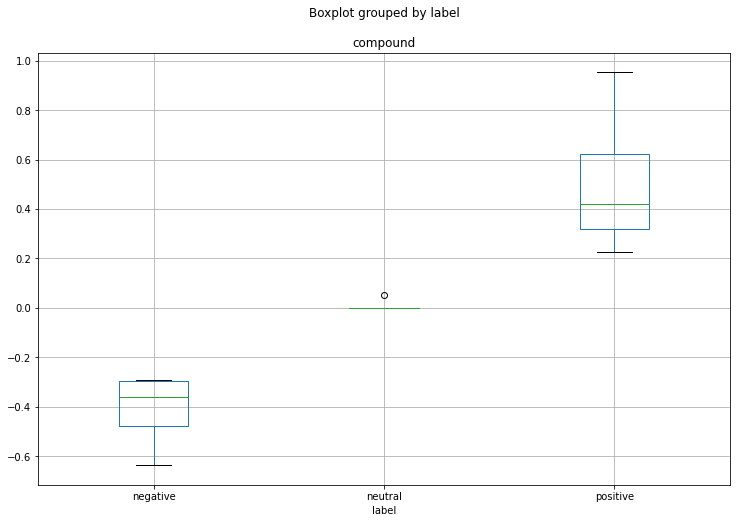

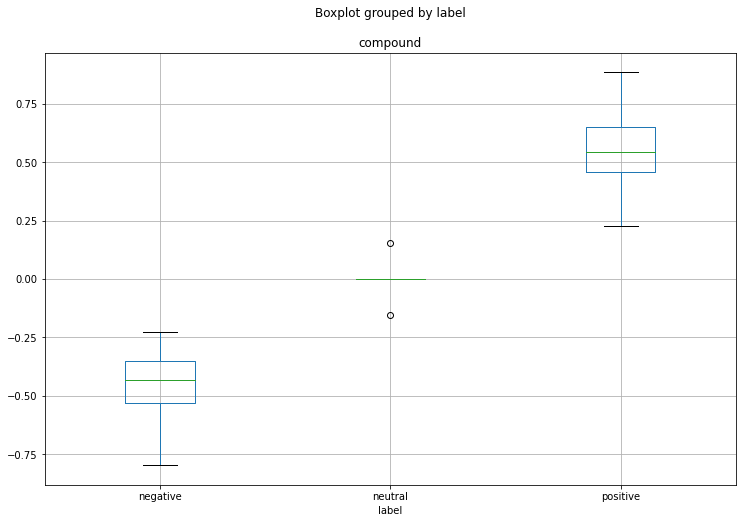

In [13]:
df.boxplot(by='label', column='compound', figsize=(12,8))
df2.boxplot(by='label', column='compound', figsize=(12,8))

We have now displayed a visualization of the findings that we have obtained from the text data, so that you can clearly see the different relationships that each subreddit has alongside food from which we can see that chicago had more variability when it came to negative food whereas UIUC had more variability when it comes to positive food reviews, but overall the opinions in relation to food appear to be relatively similar when we compare both of the cities, as illustrated within the boxplot.